In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import timestring
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We have two datasets here from the CMS State Drug Utilization Set
<li>CMS State Drug Utilization Data 2017<br>   
<li>CMS State Drug Utilization Data 2016
<li>Ref for product codes: https://data.medicaid.gov/State-Drug-Utilization/State-Drug-Utilization-Data-2016/3v6v-qk5s
<li>About CMS Product Codes: 
<li>Labeler Code: First segment of NDC that identifies the manufacturer, labeler, relabeler, packager, repackager or distributor of the drug.
<li>Product Code: Second segment of NDC.
<li>Package Size Code: Third segment of NDC. 

Drug names for opioids:<br>

REFERENCE: http://www.rehabcenter.net/list-opioids-united-states/

Brand Name Opioid Prescriptions:
    
For this dataset, you need to look up and filter down the opioid-related drugs. If you do this through
the Product Name, I used this set of opioid Rx drugs: 

<li>Abstral (fentanyl)
<li>Actiq (fentanyl)
<li>Avinza (morphine sulfate extended-release capsules)
<li>Butrans (buprenorphine transdermal system)
<li>Demerol (meperidine [also known as isonipecaine or pethidine])
<li>Dilaudid (hydromorphone [also known as dihydromorphinone])
<li>Dolophine (methadone hydrochloride tablets)
<li>Duragesic (fentanyl transdermal system)
<li>Fentora (fentanyl)
<li>Hysingla (hydrocodone)
<li>Methadose (methadone)
<li>Morphabond (morphine)
<li>Nucynta ER (tapentadol extended-release oral tablets)
<li>Onsolis (fentanyl)
<li>Oramorph (morphine)
<li>Oxaydo (oxycodone)
<li>Roxanol-T (morphine)
<li>Sublimaze (fentanyl)
<li>Xtampza ER (oxycodone)
<li>Zohydro ER (hydrocodone)

Combination Opioid Prescriptions:<br>

<li>Anexsia (hydrocodone containing acetaminophen)
<li>Co-Gesic (hydrocodone containing acetaminophen)
<li>Embeda (morphine sulfate and naltrexone extended-release capsules)
<li>Exalgo (hydromorphone hydrochloride extended-release tablets)
<li>Hycet (hydrocodone containing acetaminophen)
<li>Hycodan (hydrocodone containing homatropine)
<li>Hydromet (hydrocodone containing homatropine)
<li>Ibudone (hydrocodone containing ibuprofen)
<li>Kadian (morphine sulfate extended-release tablets)
<li>Liquicet (hydrocodone containing acetaminophen)
<li>Lorcet (hydrocodone containing acetaminophen)
<li>Lorcet Plus (hydrocodone containing acetaminophen)
<li>Lortab (hydrocodone containing acetaminophen)
<li>Maxidone (hydrocodone containing acetaminophen)
<li>MS Contin (morphine sulfate controlled-release tablets)
<li>Norco (hydrocodone containing acetaminophen)
<li>Opana ER (oxymorphone hydrochloride extended-release tablets)
<li>OxyContin (oxycodone hydrochloride controlled-release tablets)
<li>Oxycet (oxycodone containing acetaminophen)
<li>Palladone (hydromorphone hydrochloride extended-release capsules)
<li>Percocet (oxycodone containing acetaminophen)
<li>Percodan (oxycodone containing aspirin)
<li>Reprexain (hydrocodone containing ibuprofen)
<li>Rezira (hydrocodone containing pseudoephedrine)
<li>Roxicet (oxycodone containing acetaminophen)
<li>Targiniq ER (oxycodone containing naloxone)
<li>TussiCaps (hydrocodone containing chlorpheniramine)
<li>Tussionex (hydrocodone containing chlorpheniramine)
<li>Tuzistra XR (codeine containing chlorpheniramine)
<li>Tylenol #3 and #4 (codeine containing acetaminophen)
<li>Vicodin (hydrocodone containing acetaminophen)
<li>Vicodin ES (hydrocodone containing acetaminophen)
<li>Vicodin HP (hydrocodone containing acetaminophen)
<li>Vicoprofen (hydrocodone containing ibuprofen)
<li>Vituz (hydrocodone containing chlorpheniramine)
<li>Xartemis XR (oxycodone containing acetaminophen)
<li>Xodol (hydrocodone containing acetaminophen)
<li>Zolvit (hydrocodone containing acetaminophen)
<li>Zutripro (hydrocodone containing chlorpheniramine and pseudoephedrine)
<li>Zydone (hydrocodone containing acetaminophen)

Generic: <br>

<li>Fentanyl (fentanyl extended-release transdermal system)
<li>Methadone hydrochloride (methadone hydrochloride tablets, methadone hydrochloride oral solution)
<li>Morphine sulfate (morphine sulfate extended-release capsules, morphine sulfate extended-release tablets)
<li>Oxymorphone hydrochloride (oxymorphone hydrochloride extended-release tablets)




In [2]:
#CMS
cms_2017 = pd.read_csv("/Users/catherineordun/Documents/Hackathon/DHHS/ready_data/State_Drug_Utilization_Data_2017.csv")
print(cms_2017.shape) #(2343727, 20)
cms_2017.dtypes


(2343727, 20)


Utilization Type                   object
State                              object
Labeler Code                        int64
Product Code                        int64
Package Size                        int64
Year                                int64
Quarter                             int64
Product Name                       object
Suppression Used                     bool
Units Reimbursed                  float64
Number of Prescriptions           float64
Total Amount Reimbursed           float64
Medicaid Amount Reimbursed        float64
Non Medicaid Amount Reimbursed    float64
Quarter Begin                      object
Quarter Begin Date                 object
Latitude                          float64
Longitude                         float64
Location                           object
NDC                                 int64
dtype: object

In [3]:
cms_2017.rename(columns={
        'Labeler Code':'label_code',
        'Product Code':'product_code',
        'Package Size':'package_size',
        'Product Name':'product_name',
        'Suppression Used':'suppression',
        'Units Reimbursed':'units_reimb',
        'Number of Prescriptions':'num_rx',
        'Total Amount Reimbursed':'total_amt_reimb',
        'Medicaid Amount Reimbursed':'med_amt_reimb',
        'Non Medicaid Amount Reimbursed':'nonmed_amt_reimb',
        'Quarter Begin':'qtr_begin', 
        'Quarter Begin Date':'qtr_begin_date'},inplace=True)


In [5]:
cms_2017.loc[(cms_2017["product_name"] == "PERCOCET")]

,Utilization Type,State,label_code,product_code,package_size,Year,Quarter,product_name,suppression,units_reimb,num_rx,total_amt_reimb,med_amt_reimb,nonmed_amt_reimb,qtr_begin,qtr_begin_date,Latitude,Longitude,Location,NDC
84839,MCOU,XX,63481,627,70,2017,1,PERCOCET,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,NaN,NaN,NaN,63481062770
118099,FFSU,NC,63481,623,70,2017,1,PERCOCET,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,35.6411,-79.8431,"(35.6411, -79.8431)",63481062370
169729,MCOU,NH,63481,629,70,2017,1,PERCOCET,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,43.4108,-71.5653,"(43.4108, -71.5653)",63481062970
272821,FFSU,MN,63481,623,70,2017,1,PERCOCET,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,45.7326,-93.9196,"(45.7326, -93.9196)",63481062370
311125,MCOU,MN,63481,623,70,2017,1,PERCOCET,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,45.7326,-93.9196,"(45.7326, -93.9196)",63481062370
356253,FFSU,MO,63481,623,70,2017,1,PERCOCET,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,38.4623,-92.3020,"(38.4623, -92.302)",63481062370
362239,FFSU,CO,63481,628,70,2017,1,PERCOCET,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,39.0646,-105.3272,"(39.0646, -105.3272)",63481062870
372935,MCOU,MN,63481,627,70,2017,1,PERCOCET,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,45.7326,-93.9196,"(45.7326, -93.9196)",63481062770
384674,FFSU,NC,63481,628,70,2017,1,PERCOCET,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,35.6411,-79.8431,"(35.6411, -79.8431)",63481062870
447304,FFSU,XX,63481,623,85,2017,1,PERCOCET,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,NaN,NaN,NaN,63481062385


You'll notice here that the Labeler Code + Product Code is equal to in the
nda_product file the following: 
    
<li>PRODUCTNDC: 57881-332	

In order to determine the packagem dosage, and manufacturer, you need to merge together the product 
and package files from the NDA at FDA. 


In [4]:
#this is a different dataset from the FDA
nda_product = pd.read_csv("/Users/catherineordun/Documents/Hackathon/DHHS/nda_product.csv")

In [5]:
nda_product.head()

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE
0,0363-0810_298b1eeb-c214-4d67-8c7f-4682bac2cf23,0363-0810,HUMAN OTC DRUG,70%,NaN,Isopropyl alcohol,LIQUID,TOPICAL,19891015.0,NaN,OTC MONOGRAPH NOT FINAL,part333A,"Walgreens, CO.",ISOPROPYL ALCOHOL,500,mg/mL,NaN,NaN
1,0574-0067_cba29e3c-d446-4a70-928a-c98ed8eedcc6,0574-0067,HUMAN OTC DRUG,70%,NaN,Isopropyl alcohol,LIQUID,TOPICAL,20140414.0,NaN,OTC MONOGRAPH NOT FINAL,part333A,"Paddock Laboratories, LLC",ISOPROPYL ALCOHOL,500,mg/mL,NaN,NaN
2,11673-810_fe48f8bd-77f0-487b-b24f-217a3601fd62,11673-810,HUMAN OTC DRUG,70%,NaN,Isopropyl alcohol,LIQUID,TOPICAL,19890715.0,NaN,OTC MONOGRAPH NOT FINAL,part333A,"Target Corp.,",ISOPROPYL ALCOHOL,500,mg/mL,NaN,NaN
3,37012-810_3eedb9fd-22af-4650-b110-459d644f47dd,37012-810,HUMAN OTC DRUG,70%,NaN,Isopropyl alcohol,LIQUID,TOPICAL,20080102.0,NaN,OTC MONOGRAPH NOT FINAL,part333A,Shopko Stores Operating Co,ISOPROPYL ALCOHOL,500,mg/mL,NaN,NaN
4,37808-810_e723ebfd-b701-4f61-aedc-d6d93d277ac8,37808-810,HUMAN OTC DRUG,70%,NaN,Isopropyl alcohol,LIQUID,TOPICAL,20150618.0,NaN,OTC MONOGRAPH NOT FINAL,part333A,H-E-B,ISOPROPYL ALCOHOL,500,mg/mL,NaN,NaN


Steps:<br>
#1. Now, we need to extract out from the cms_2017 file, all the drugs that are opioid drugs 
#2. Create a new field called PRODUCTNDC
#3. And merge with nda_product to get the dosage and manufacturer name
#4. Convert the 'STARTMARKETINGDATE' from float -> datetime


In [6]:
#these are all the drugs listed above in a csv
druglist= pd.read_csv("/Users/catherineordun/Documents/Hackathon/DHHS/druglist.csv")


In [7]:
druglist.head()

,Abstral
0,Abstral
1,Actiq
2,Avinza
3,Butrans
4,Demerol


In [8]:
#flatten to remove it as a list of lists
searchlist = druglist.values.T.flatten()


In [9]:
searchlist

array(['Abstral', 'Actiq', 'Avinza', 'Butrans', 'Demerol', 'Dilaudid',
       'Dolophine', 'Duragesic', 'Fentora', 'Hysingla', 'Methadose',
       'Morphabond', 'Nucynta ER', 'Onsolis', 'Oramorph', 'Oxaydo',
       'Roxanol-T', 'Sublimaze', 'Xtampza', 'Zohydro', 'Anexsia',
       'Co-Gesic', 'Embeda', 'Exalgo', 'Hycet', 'Hycodan', 'Hydromet',
       'Ibudone', 'Kadian', 'Liquicet', 'Lorcet', 'Lorcet Plus', 'Lortab',
       'Maxidone', 'MS Contin', 'Norco', 'Opana ER', 'OxyContin', 'Oxycet',
       'Palladone', 'Percocet', 'Percodan', 'Reprexain', 'Rezira',
       'Roxicet', 'Targiniq ER', 'TussiCaps', 'Tussionex', 'Tuzistra XR',
       'Tylenol 3', 'Tylenol 4', 'Vicodin', 'Vicodin ES', 'Vicodin HP',
       'Vicoprofen', 'Vituz', 'Xartemis XR', 'Xodol', 'Zolvit', 'Zutripro',
       'Zydone', 'Fentanyl', 'Methadone hydrochloride', 'Morphine sulfate',
       'Oxymorphone hydrochloride'], dtype=object)

In [10]:
#capitalize all drug names in searchlist b/c the product_name is all capitalized
cap_searchlist = [element.upper() for element in searchlist]


In [11]:
#make sure all the product_names are capitalized in the dataframe so we get everything 
cms_2017['product_name'] = map(lambda x: str(x).upper(), cms_2017['product_name'])


In [12]:
#now search through to find a match
cms_2017_opioids = cms_2017.query('product_name in @cap_searchlist')
print(cms_2017_opioids['product_name'].nunique()) #33
print(len(searchlist)) #65


33
65


In [13]:
#make a new column called 'PRODUCTNDC'
cms_2017_opioids['PRODUCTNDC'] = cms_2017_opioids['label_code'].astype(str) + '-' +cms_2017_opioids['product_code'].astype(str)


/Users/catherineordun/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
#check it's right
cms_2017_opioids.loc[(cms_2017_opioids["product_name"] == "ABSTRAL")] #ok it works

,Utilization Type,State,label_code,product_code,package_size,Year,Quarter,product_name,suppression,units_reimb,...,total_amt_reimb,med_amt_reimb,nonmed_amt_reimb,qtr_begin,qtr_begin_date,Latitude,Longitude,Location,NDC,PRODUCTNDC
1065170,FFSU,MO,57881,332,32,2017,2,ABSTRAL,True,NaN,...,NaN,NaN,NaN,4/1,04/01/2017 12:00:00 AM,38.4623,-92.302,"(38.4623, -92.302)",57881033232,57881-332
2205338,FFSU,XX,57881,332,32,2017,2,ABSTRAL,True,NaN,...,NaN,NaN,NaN,4/1,04/01/2017 12:00:00 AM,NaN,NaN,NaN,57881033232,57881-332


In [15]:
nda_product.loc[(nda_product["PRODUCTNDC"] == "409-1201")] #there are products in CMS that aren't in the NDA products

#for example, the above 409-1201 is demerol and demerol is not in the nda PRODUCTS table
cms_2017_opioids.loc[(cms_2017_opioids["PRODUCTNDC"] == "409-1201")] #ok it works


,Utilization Type,State,label_code,product_code,package_size,Year,Quarter,product_name,suppression,units_reimb,...,total_amt_reimb,med_amt_reimb,nonmed_amt_reimb,qtr_begin,qtr_begin_date,Latitude,Longitude,Location,NDC,PRODUCTNDC
34099,MCOU,KY,409,1201,20,2017,1,DEMEROL,True,NaN,...,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,37.6690,-84.6514,"(37.669, -84.6514)",409120120,409-1201
304760,FFSU,SC,409,1201,20,2017,1,DEMEROL,True,NaN,...,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,33.8191,-80.9066,"(33.8191, -80.9066)",409120120,409-1201
378029,FFSU,TN,409,1201,20,2017,1,DEMEROL,False,49.0,...,23.30,23.30,0.00,1/1,01/01/2017 12:00:00 AM,35.7449,-86.7489,"(35.7449, -86.7489)",409120120,409-1201
535681,MCOU,MN,409,1201,20,2017,1,DEMEROL,True,NaN,...,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,45.7326,-93.9196,"(45.7326, -93.9196)",409120120,409-1201
563779,MCOU,SC,409,1201,20,2017,1,DEMEROL,True,NaN,...,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,33.8191,-80.9066,"(33.8191, -80.9066)",409120120,409-1201
616224,FFSU,NC,409,1201,20,2017,1,DEMEROL,True,NaN,...,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,35.6411,-79.8431,"(35.6411, -79.8431)",409120120,409-1201
658637,MCOU,TN,409,1201,20,2017,1,DEMEROL,True,NaN,...,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,35.7449,-86.7489,"(35.7449, -86.7489)",409120120,409-1201
1029239,MCOU,MN,409,1201,20,2017,2,DEMEROL,True,NaN,...,NaN,NaN,NaN,4/1,04/01/2017 12:00:00 AM,45.7326,-93.9196,"(45.7326, -93.9196)",409120120,409-1201
1035148,MCOU,SC,409,1201,20,2017,2,DEMEROL,True,NaN,...,NaN,NaN,NaN,4/1,04/01/2017 12:00:00 AM,33.8191,-80.9066,"(33.8191, -80.9066)",409120120,409-1201
1116803,FFSU,NC,409,1201,20,2017,2,DEMEROL,True,NaN,...,NaN,NaN,NaN,4/1,04/01/2017 12:00:00 AM,35.6411,-79.8431,"(35.6411, -79.8431)",409120120,409-1201


<b>MERGE FDA AND CMS</b>

In [16]:
#MERGE WITH NDA PRODUCT DF
cms_2017_opioids_fin = pd.merge(cms_2017_opioids, nda_product, on='PRODUCTNDC', how='left')
#how many are missing
cms_2017_opioids_fin['PRODUCTID'].isnull().sum() #1840
len(cms_2017_opioids_fin) #5265 total records


5265

In [17]:
cms_2017_opioids_fin.head()

,Utilization Type,State,label_code,product_code,package_size,Year,Quarter,product_name,suppression,units_reimb,...,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE
0,FFSU,MI,409,1256,1,2017,1,DEMEROL,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FFSU,MN,59011,460,10,2017,1,OXYCONTIN,False,961.0,...,20100808.0,NaN,NDA,NDA022272,Purdue Pharma LP,OXYCODONE HYDROCHLORIDE,60,mg/1,"Full Opioid Agonists [MoA],Opioid Agonist [EPC]",CII
2,FFSU,AK,63481,817,60,2017,1,OPANA ER,True,NaN,...,20120320.0,20191101.0,NDA,NDA201655,"Endo Pharmaceuticals, Inc.",OXYMORPHONE HYDROCHLORIDE,30,mg/1,"Full Opioid Agonists [MoA],Opioid Agonist [EPC]",CII
3,MCOU,LA,59011,751,4,2017,1,BUTRANS,True,NaN,...,20110214.0,NaN,NDA,NDA021306,Purdue Pharma LP,BUPRENORPHINE,10,ug/h,"Partial Opioid Agonist [EPC],Partial Opioid Ag...",CIII
4,FFSU,VT,50458,94,5,2017,1,DURAGESIC,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cms_2017_opioids_fin.dtypes

Utilization Type              object
State                         object
label_code                     int64
product_code                   int64
package_size                   int64
Year                           int64
Quarter                        int64
product_name                  object
suppression                     bool
units_reimb                  float64
num_rx                       float64
total_amt_reimb              float64
med_amt_reimb                float64
nonmed_amt_reimb             float64
qtr_begin                     object
qtr_begin_date                object
Latitude                     float64
Longitude                    float64
Location                      object
NDC                            int64
PRODUCTNDC                    object
PRODUCTID                     object
PRODUCTTYPENAME               object
PROPRIETARYNAME               object
PROPRIETARYNAMESUFFIX         object
NONPROPRIETARYNAME            object
DOSAGEFORMNAME                object
R

In [19]:
#convert startmarketingdate and endmarketingdate to datetime
#startdate
cms_2017_opioids_fin['STARTMARKETINGDATE'].fillna(value=0, inplace=True)
cms_2017_opioids_fin['STARTMARKETINGDATE'] = map(lambda x: int(x), cms_2017_opioids_fin['STARTMARKETINGDATE'])
cms_2017_opioids_fin['STARTMARKETINGDATE'] = cms_2017_opioids_fin['STARTMARKETINGDATE'].apply(str)
cms_2017_opioids_fin['startdate'] = map(lambda x: x[0:4] + "-" + x[4:6] + "-" + x[6:], cms_2017_opioids_fin['STARTMARKETINGDATE'])
cms_2017_opioids_fin['startdate'].replace(to_replace='0--', value='1970-01-01', inplace=True)
cms_2017_opioids_fin['startdate'] = pd.to_datetime(cms_2017_opioids_fin['startdate'], format='%Y-%m-%d')


In [20]:
#enddate
cms_2017_opioids_fin['ENDMARKETINGDATE'].fillna(value=0, inplace=True)
cms_2017_opioids_fin['ENDMARKETINGDATE'] = map(lambda x: int(x), cms_2017_opioids_fin['ENDMARKETINGDATE'])
cms_2017_opioids_fin['ENDMARKETINGDATE'] = cms_2017_opioids_fin['ENDMARKETINGDATE'].apply(str)
cms_2017_opioids_fin['enddate'] = map(lambda x: x[0:4] + "-" + x[4:6] + "-" + x[6:], cms_2017_opioids_fin['ENDMARKETINGDATE'])
cms_2017_opioids_fin['enddate'].replace(to_replace='0--', value='1970-01-01', inplace=True)
cms_2017_opioids_fin['enddate'] = pd.to_datetime(cms_2017_opioids_fin['enddate'], format='%Y-%m-%d')


<b>Calculate days of marketing</b>

In [21]:
#==CALCULATE MARKETING DAYS
#how many are null for the datetime values
#--- there is a start but no enddate, n=3160
len(cms_2017_opioids_fin.loc[(cms_2017_opioids_fin['startdate'] != '1970-01-01') & (cms_2017_opioids_fin['enddate'] == '1970-01-01')])
#-- there is no start but there is an enddate, n=0
#this tells me that when there is an enddate, there is a startdate
len(cms_2017_opioids_fin.loc[(cms_2017_opioids_fin['startdate'] == '1970-01-01') & (cms_2017_opioids_fin['enddate'] != '1970-01-01')])
#-- there is no start and enddate, n=1840
len(cms_2017_opioids_fin.loc[(cms_2017_opioids_fin['startdate'] == '1970-01-01') & (cms_2017_opioids_fin['enddate'] == '1970-01-01')])

cms_2017_opioids_fin['dummy'] = pd.to_datetime('2017-12-06', format='%Y-%m-%d')

cms_2017_opioids_fin['days_marketing'] = np.where(
        ((cms_2017_opioids_fin['startdate'] != '1970-01-01') & (cms_2017_opioids_fin['enddate'] == '1970-01-01')), 
        ((cms_2017_opioids_fin['dummy'] - cms_2017_opioids_fin['startdate']).dt.days),
        ((cms_2017_opioids_fin['enddate'] - cms_2017_opioids_fin['startdate']).dt.days))



In [22]:
cms_2017_opioids_fin.dtypes

Utilization Type                     object
State                                object
label_code                            int64
product_code                          int64
package_size                          int64
Year                                  int64
Quarter                               int64
product_name                         object
suppression                            bool
units_reimb                         float64
num_rx                              float64
total_amt_reimb                     float64
med_amt_reimb                       float64
nonmed_amt_reimb                    float64
qtr_begin                            object
qtr_begin_date                       object
Latitude                            float64
Longitude                           float64
Location                             object
NDC                                   int64
PRODUCTNDC                           object
PRODUCTID                            object
PRODUCTTYPENAME                 

this dataframe: cms_2017_opioids_fin is what's in the hackathon repo.

<b>Some key stats</b>

In [23]:
cms17_stats = pd.pivot_table(cms_2017_opioids_fin,index=["State", "Quarter", "startdate", "product_name", "DOSAGEFORMNAME", "LABELERNAME", "ROUTENAME", "DEASCHEDULE", "ACTIVE_NUMERATOR_STRENGTH","ACTIVE_INGRED_UNIT"], 
                                values=['units_reimb', 'num_rx', 'total_amt_reimb', 
                                        'med_amt_reimb', 'nonmed_amt_reimb', 'days_marketing'], 
               aggfunc={'units_reimb': lambda x: x.sum(), 
                        'num_rx': lambda x: x.sum(), 
                        'total_amt_reimb': lambda x: x.sum(),
                        'med_amt_reimb': lambda x: x.sum(),
                        'nonmed_amt_reimb':lambda x: x.sum(),
                        'days_marketing': lambda x: x.mean()})

cms17_stats_fin = cms17_stats.reset_index()
cms17_stats_fin.rename(columns={'units_reimb': 'units_reimb_sum', 
                                'num_rx':'num_rx_sum', 
                                'total_amt_reimb':'total_amt_reimb_sum',
                                'med_amt_reimb':'med_amt_reimb_sum',
                                'nonmed_amt_reimb':'nonmed_amt_reimb_sum'}, inplace=True)
cms17_stats_fin.reset_index(inplace=True)



After talking to a doctor friend of mine, figured out that ACTIVE_NUMERATOR_STRENGTH is the dosage.

In [24]:
cms17_stats_fin['strength'] = cms17_stats_fin['ACTIVE_NUMERATOR_STRENGTH'].str.split(';').str[0]
cms17_stats_fin['strength'].fillna(value=0, inplace=True)
cms17_stats_fin['strength'] = map(lambda x: float(x), cms17_stats_fin['strength'])


<b>Need to convert the micrograms and milligrams into grams to match the NBIRS dataset</b>

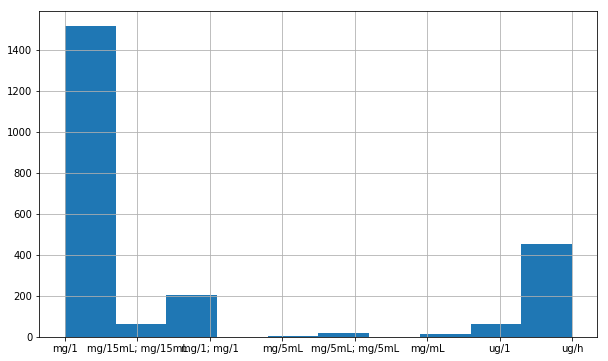

In [25]:
#=======CONVERSION 

#need to convert everything into grams to match the NIBRS dataset in grams
cms17_stats_fin['ACTIVE_INGRED_UNIT'].unique()
"""

shows that nothing is in grams 

array(['ug/h', '
       mg/1', 
       'mg/1; mg/1', 
       'mg/15mL; mg/15mL', 
       'mg/5mL; mg/5mL',
       'mg/mL', 
       'ug/1', 
       'mg/5mL'], dtype=object)
"""
cms17_stats_fin['ACTIVE_INGRED_UNIT'].hist(figsize=(10,6))
cms17_stats_fin.sort_values(by='ACTIVE_INGRED_UNIT', ascending=True)

#convert micrograms (ug) to grams = ug x 0.000001, and since all else is milligrams, mg x 0.001
cms17_stats_fin['gram_converted'] = np.where(
        ((cms17_stats_fin['ACTIVE_INGRED_UNIT'] == 'ug/h') | (cms17_stats_fin['ACTIVE_INGRED_UNIT'] == 'ug/l')), 
        (cms17_stats_fin['strength']*.000001),(cms17_stats_fin['strength']*.001))

#How much drugs have been reimbursed, providing us a proxy measure of legitimate hospital supply of drugs? Multiply units_reimb_sum by strength.
cms17_stats_fin['legit_supply'] = cms17_stats_fin['units_reimb_sum'] * cms17_stats_fin['gram_converted']
cms17_stats_fin.fillna(value=0, inplace=True)



<b>FINAL HACKATHON DATASET</b>

In [26]:
#this is the datset we will use
supply_index_2017 = cms17_stats_fin[['State', 'Quarter', 'startdate', 'days_marketing', 'product_name', 'LABELERNAME', 'DOSAGEFORMNAME', 'ROUTENAME', 'legit_supply']]
supply_index_2017.head(25)


,State,Quarter,startdate,days_marketing,product_name,LABELERNAME,DOSAGEFORMNAME,ROUTENAME,legit_supply
0,AK,1,1956-01-01,22620,DILAUDID,Purdue Pharma LP,TABLET,ORAL,0.00000
1,AK,1,1987-12-31,10933,TUSSIONEX,Unither Manufacturing LLC,"SUSPENSION, EXTENDED RELEASE",ORAL,0.00000
2,AK,1,1997-06-25,7730,NORCO,"Actavis Pharma, Inc.",TABLET,ORAL,0.00000
3,AK,1,2007-08-20,3761,FENTANYL,Par Pharmaceutical Inc.,PATCH,TRANSDERMAL,0.00000
4,AK,1,2007-08-20,3761,FENTANYL,Par Pharmaceutical Inc.,PATCH,TRANSDERMAL,0.00000
5,AK,1,2007-08-20,3761,FENTANYL,Par Pharmaceutical Inc.,PATCH,TRANSDERMAL,0.00000
6,AK,1,2009-08-13,3037,EMBEDA,Pfizer Laboratories Div Pfizer Inc,"CAPSULE, EXTENDED RELEASE",ORAL,0.00000
7,AK,1,2009-08-13,3037,EMBEDA,Pfizer Laboratories Div Pfizer Inc,"CAPSULE, EXTENDED RELEASE",ORAL,0.00000
8,AK,1,2010-08-08,2677,OXYCONTIN,Purdue Pharma LP,"TABLET, FILM COATED, EXTENDED RELEASE",ORAL,50.34000
9,AK,1,2010-08-08,2677,OXYCONTIN,Purdue Pharma LP,"TABLET, FILM COATED, EXTENDED RELEASE",ORAL,37.86000


<b>Texas</b>

In [27]:
tx_supply = supply_index_2017.loc[(supply_index_2017['State'] == 'TX')]
tx_supply

,State,Quarter,startdate,days_marketing,product_name,LABELERNAME,DOSAGEFORMNAME,ROUTENAME,legit_supply
2046,TX,1,1987-07-01,11116,MS CONTIN,Purdue Pharma LP,"TABLET, FILM COATED, EXTENDED RELEASE",ORAL,0.00
2047,TX,1,1987-07-01,11116,MS CONTIN,Purdue Pharma LP,"TABLET, FILM COATED, EXTENDED RELEASE",ORAL,0.00
2048,TX,1,1987-12-31,10933,TUSSIONEX,Unither Manufacturing LLC,"SUSPENSION, EXTENDED RELEASE",ORAL,0.00
2049,TX,1,2010-08-08,2677,OXYCONTIN,Purdue Pharma LP,"TABLET, FILM COATED, EXTENDED RELEASE",ORAL,92.64
2050,TX,1,2010-08-08,2677,OXYCONTIN,Purdue Pharma LP,"TABLET, FILM COATED, EXTENDED RELEASE",ORAL,59.16
2051,TX,1,2010-08-08,2677,OXYCONTIN,Purdue Pharma LP,"TABLET, FILM COATED, EXTENDED RELEASE",ORAL,291.32
2052,TX,1,2010-08-08,2677,OXYCONTIN,Purdue Pharma LP,"TABLET, FILM COATED, EXTENDED RELEASE",ORAL,303.66
2053,TX,1,2010-08-08,2677,OXYCONTIN,Purdue Pharma LP,"TABLET, FILM COATED, EXTENDED RELEASE",ORAL,411.68
2054,TX,1,2010-08-08,2677,OXYCONTIN,Purdue Pharma LP,"TABLET, FILM COATED, EXTENDED RELEASE",ORAL,541.38
2055,TX,1,2010-08-08,2677,OXYCONTIN,Purdue Pharma LP,"TABLET, FILM COATED, EXTENDED RELEASE",ORAL,804.24


<b>CMS 2016 Data</b>

In [ ]:
cms_2016 = pd.read_csv("/Users/catherineordun/Documents/Hackathon/DHHS/ready_data/State_Drug_Utilization_Data_2016.csv")
print(cms_2016.shape) #(4625479, 20)
cms_2016.rename(columns={
        'Labeler Code':'label_code',
        'Product Code':'product_code',
        'Package Size':'package_size',
        'Product Name':'product_name',
        'Suppression Used':'suppression',
        'Units Reimbursed':'units_reimb',
        'Number of Prescriptions':'num_rx',
        'Total Amount Reimbursed':'total_amt_reimb',
        'Medicaid Amount Reimbursed':'med_amt_reimb',
        'Non Medicaid Amount Reimbursed':'nonmed_amt_reimb',
        'Quarter Begin':'qtr_begin', 
        'Quarter Begin Date':'qtr_begin_date'},inplace=True)

#make sure all the product_names are capitalized in the dataframe so we get everything 
cms_2016['product_name'] = map(lambda x: str(x).upper(), cms_2016['product_name'])

#now search through to find a match
cms_2016_opioids = cms_2016.query('product_name in @cap_searchlist')
print(cms_2016_opioids['product_name'].nunique()) #33

#make a new column called 'PRODUCTNDC'
cms_2016_opioids['PRODUCTNDC'] = cms_2016_opioids['label_code'].astype(str) + '-' +cms_2016_opioids['product_code'].astype(str)

#check it's right
cms_2016_opioids.loc[(cms_2016_opioids["product_name"] == "ABSTRAL")] #ok it works
#MERGE WITH NDA PRODUCT DF
cms_2016_opioids_fin = pd.merge(cms_2016_opioids, nda_product, on='PRODUCTNDC', how='left')
len(cms_2016_opioids_fin) #11287
cms_2016_opioids_fin['PRODUCTID'].isnull().sum() #4039

#convert startmarketingdate and endmarketingdate to datetime
#startdate
cms_2016_opioids_fin['STARTMARKETINGDATE'].fillna(value=0, inplace=True)
cms_2016_opioids_fin['STARTMARKETINGDATE'] = map(lambda x: int(x), cms_2016_opioids_fin['STARTMARKETINGDATE'])
cms_2016_opioids_fin['STARTMARKETINGDATE'] = cms_2016_opioids_fin['STARTMARKETINGDATE'].apply(str)
cms_2016_opioids_fin['startdate'] = map(lambda x: x[0:4] + "-" + x[4:6] + "-" + x[6:], cms_2016_opioids_fin['STARTMARKETINGDATE'])
cms_2016_opioids_fin['startdate'].replace(to_replace='0--', value='1970-01-01', inplace=True)
cms_2016_opioids_fin['startdate'] = pd.to_datetime(cms_2016_opioids_fin['startdate'], format='%Y-%m-%d')

#enddate
cms_2016_opioids_fin['ENDMARKETINGDATE'].fillna(value=0, inplace=True)
cms_2016_opioids_fin['ENDMARKETINGDATE'] = map(lambda x: int(x), cms_2016_opioids_fin['ENDMARKETINGDATE'])
cms_2016_opioids_fin['ENDMARKETINGDATE'] = cms_2016_opioids_fin['ENDMARKETINGDATE'].apply(str)
cms_2016_opioids_fin['enddate'] = map(lambda x: x[0:4] + "-" + x[4:6] + "-" + x[6:], cms_2016_opioids_fin['ENDMARKETINGDATE'])
cms_2016_opioids_fin['enddate'].replace(to_replace='0--', value='1970-01-01', inplace=True)
cms_2016_opioids_fin['enddate'] = pd.to_datetime(cms_2016_opioids_fin['enddate'], format='%Y-%m-%d')
#send to csv
#cms_2016_opioids_fin.to_csv("/Users/catherineordun/Documents/Hackathon/DHHS/final_datasets/cms_2016_opioids_fin.csv")
#Pivot Table with Key STats
cms16_stats = pd.pivot_table(cms_2016_opioids_fin,index=["State", "Quarter", "product_name", "DOSAGEFORMNAME", "LABELERNAME", "ROUTENAME", "DEASCHEDULE", "ACTIVE_NUMERATOR_STRENGTH"], 
                                values=['units_reimb', 'num_rx', 'total_amt_reimb', 
                                        'med_amt_reimb', 'nonmed_amt_reimb'], 
               aggfunc={'units_reimb': lambda x: x.sum(), 
                        'num_rx': lambda x: x.sum(), 
                        'total_amt_reimb': lambda x: x.sum(),
                        'med_amt_reimb': lambda x: x.sum(),
                        'nonmed_amt_reimb':lambda x: x.sum()})

cms16_stats_fin = cms16_stats.reset_index()
cms16_stats_fin.rename(columns={'units_reimb': 'units_reimb_sum', 
                                'num_rx':'num_rx_sum', 
                                'total_amt_reimb':'total_amt_reimb_sum',
                                'med_amt_reimb':'med_amt_reimb_sum',
                                'nonmed_amt_reimb':'nonmed_amt_reimb_sum'}, inplace=True)
cms16_stats_fin.reset_index(inplace=True)
    
cms16_stats_fin['strength'] = cms16_stats_fin['ACTIVE_NUMERATOR_STRENGTH'].str.split(';').str[0]
cms16_stats_fin['strength'].fillna(value=0, inplace=True)
cms16_stats_fin['strength'] = map(lambda x: float(x), cms16_stats_fin['strength'])


In [ ]:
cms16_stats_fin.head()